In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pylab
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

Будем учиться классифицировать жанры музыки, полузуюсь не аудио дорожками, а уже осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

количество (строк, колонок) =  (17996, 17)


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

None

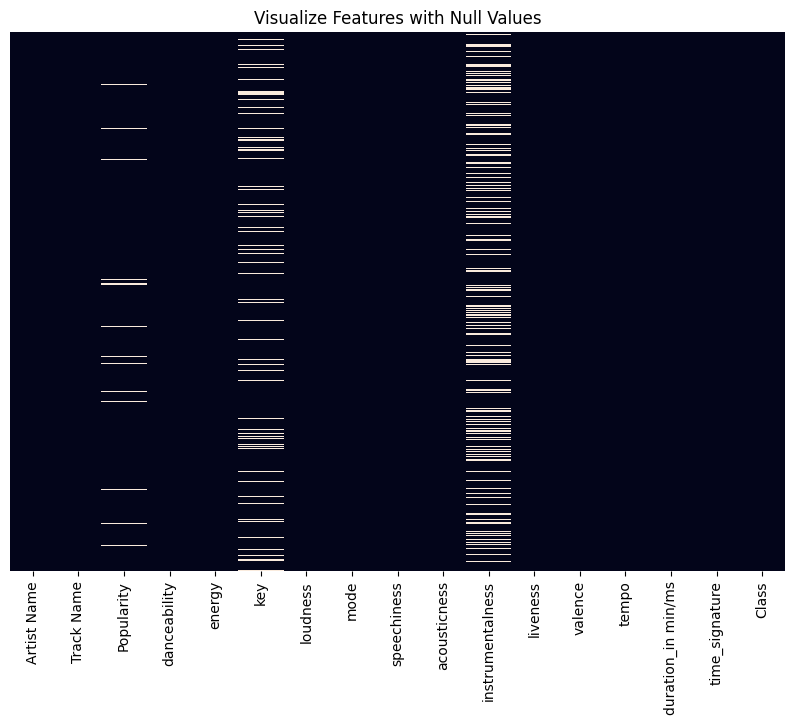

количество уникальных значений по колонкам:
Artist Name            9149
Track Name            15129
Popularity              100
danceability            909
energy                 1208
key                      11
loudness               9002
mode                      2
speechiness            1194
acousticness           3930
instrumentalness       4253
liveness               1459
valence                1320
tempo                 13562
duration_in min/ms    14121
time_signature            4
Class                    11
dtype: int64


In [148]:
data = pd.read_csv("../Data/train.csv")
print("количество (строк, колонок) = ", data.shape)
display(data.head())
display(data.describe())
display(data.info())
plt.figure(figsize=(10,7))
sns.heatmap(data.isna(),yticklabels=False,cbar=False)
plt.title('Visualize Features with Null Values')
plt.show()
print("количество уникальных значений по колонкам:")
print(data.nunique())

Видим, что все переменные кроме строки и названия численные, строку и название уберем, так так предсказывать жанр музыки по исполнителю и название вряд ли то, что нам нужно. Есть пропущенные значения в колонках instrumentalness и key.
Что-то странное происходит с длиной композиции, по разбросу значений, видно, что представлено в двух единицах измерения, приведем все к минутам 
Колонки *mode*, *time_signature*, *key* и *class* являются категориальными. 
*Mode* принимает всего два значения, 
*time_signature* это такт, и пока мне не очень понтно, скрыто ли что-то числовое в этой кодировке (подавлющее число имеют значение 4, и возможно это количество четвертей), возможно его стоит обработать OneHotEncoder, а возможно, нет. 

*key* это тональность, думаю тут тоже может быть смысл в распределении от 1 до 11. Так что ее оставим без изменений.
Class обработаем Label Encoder


Посмотрим баланс классов

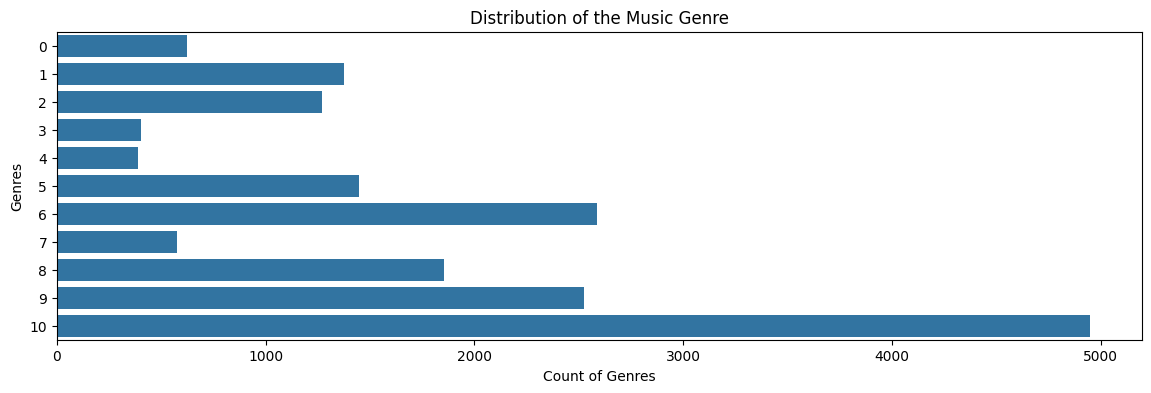

In [149]:
plt.figure(figsize=(14,4))
sns.countplot(y=data['Class'])
plt.title('Distribution of the Music Genre')
plt.ylabel('Genres')
plt.xlabel('Count of Genres')
plt.show()

Не очень сбалансированы, надо будет это учесть при разбиении

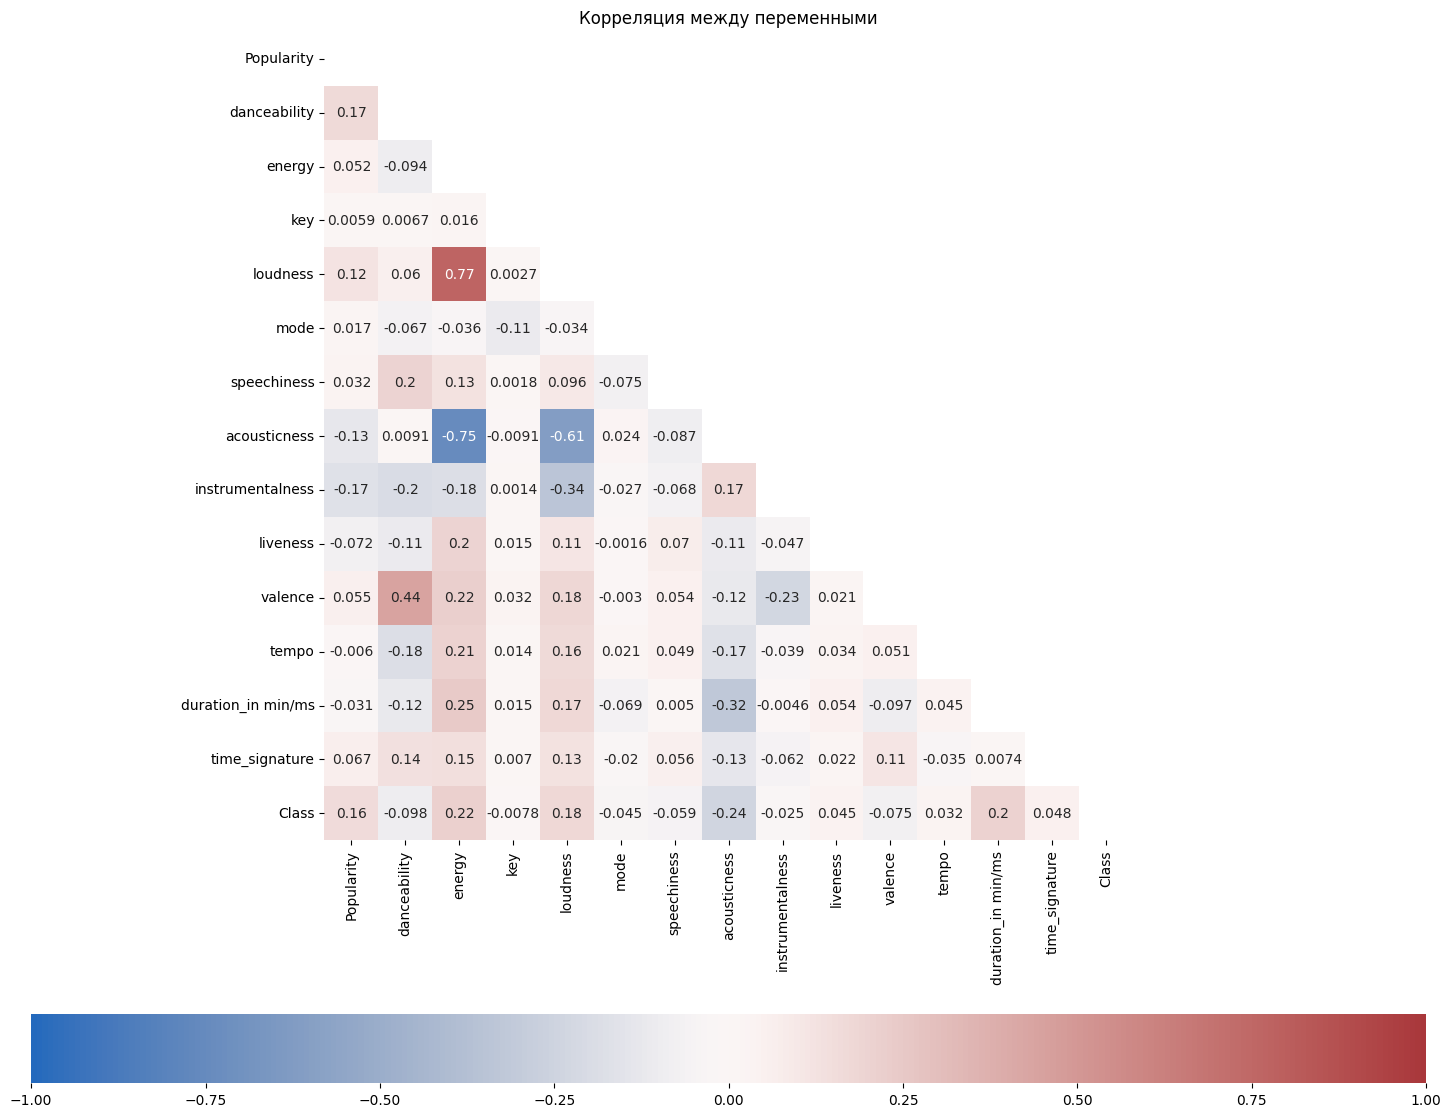

number or outliers for column Popularity = 0 

number or outliers for column danceability = 0 

number or outliers for column energy = 0 

number or outliers for column key = 0 

number or outliers for column loudness = 499 

number or outliers for column mode = 0 

number or outliers for column speechiness = 1696 

number or outliers for column acousticness = 0 

number or outliers for column instrumentalness = 2141 

number or outliers for column liveness = 722 

number or outliers for column valence = 0 

number or outliers for column tempo = 0 

number or outliers for column duration_in min/ms = 409 

number or outliers for column time_signature = 1545 

number or outliers for column Class = 0 

Number of dublicates = 0 



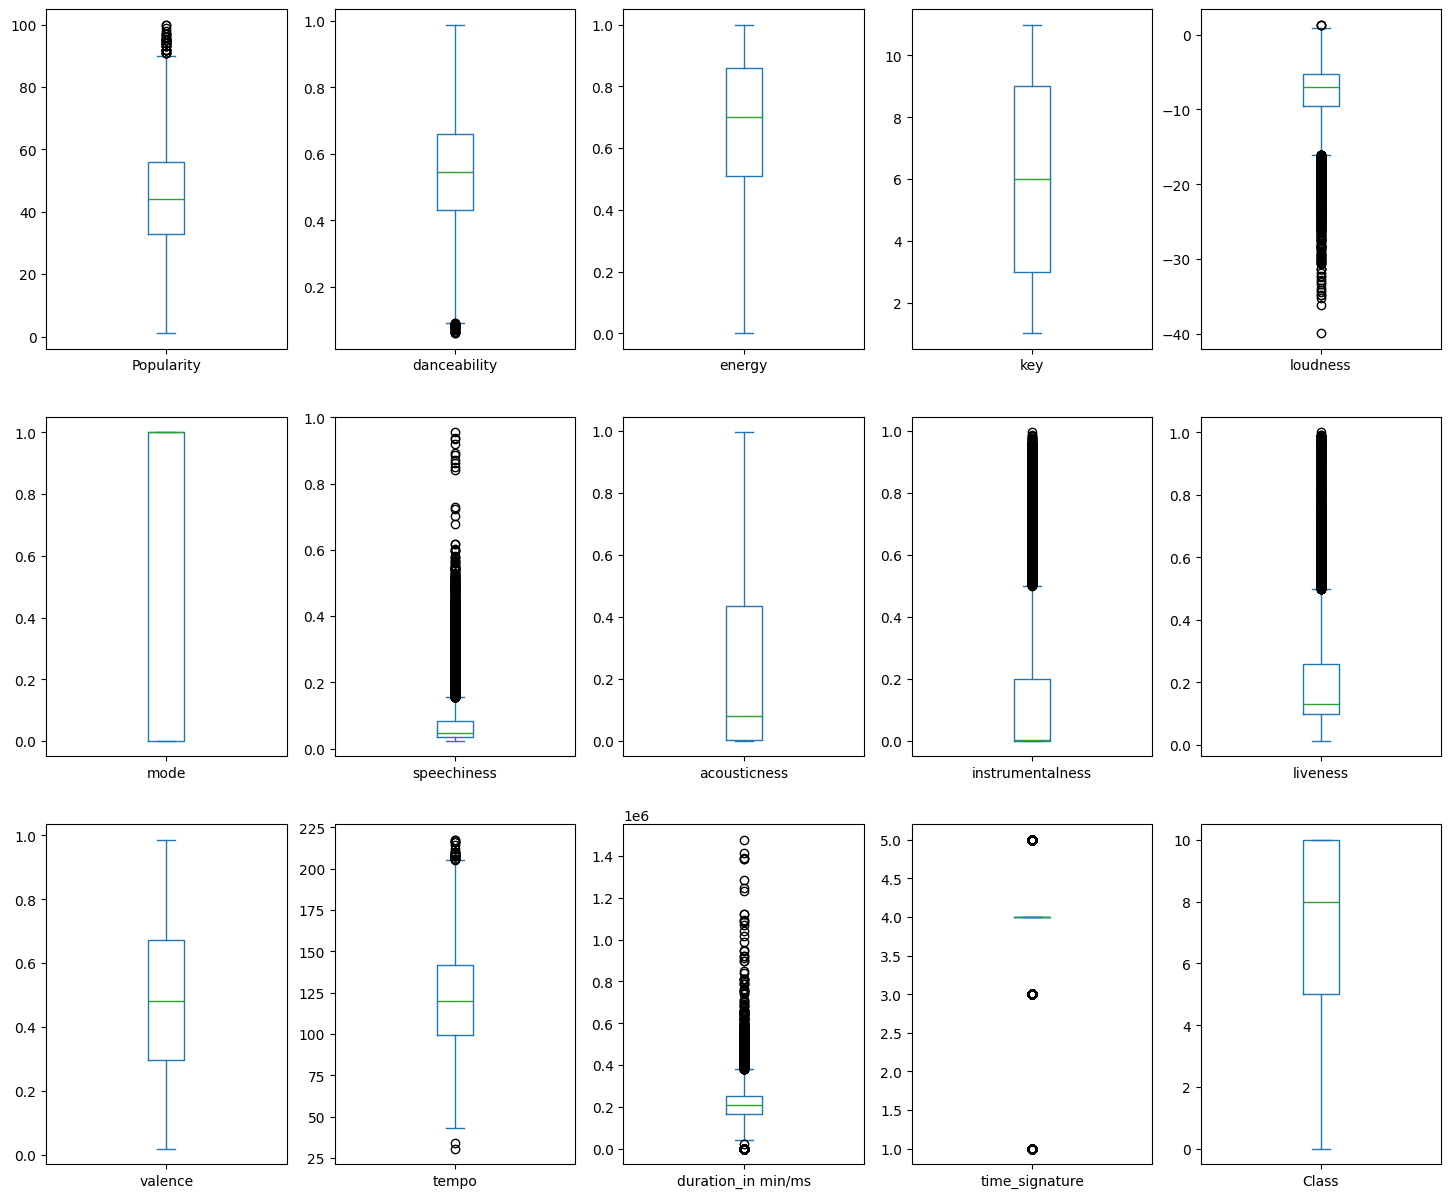

In [150]:
df = data
numeric = []
for i in range (0, df.shape[1]):
    if df.iloc[ :  , i].dtype == 'int' or df.iloc[ : ,i].dtype == 'float':
        numeric.append(df.columns[i])

    # создание heatplot корреляции
tr = np.triu(df[numeric].corr())
plt.rcParams["figure.figsize"] = 18, 15
#pylab.subplot (1, 2, 2)
sns.heatmap(df[numeric].corr(), annot = True, cbar_kws= {'orientation': 'horizontal'},  vmin=-1, vmax=1, center= 0, square=True, cmap="vlag", mask = tr)
pylab.title ("Корреляция между переменными")
pylab.show()

# анализ выбросов
for name in numeric:
    q1 = df[name].quantile(0.25)
    q3 = df[name].quantile(0.75)         
    outliers = df[(df[name] < q1 - 2*(q3-q1)) | (df[name] > q3 + 2*(q3-q1))]
    print(f"number or outliers for column {name} =", len(outliers), "\n")
#display(df.head())
#display(df.describe())
df.isnull().sum()
print('Number of dublicates =', len(df) - len(df.drop_duplicates()), "\n")  


df.plot(kind = "box" , subplots = True , figsize = (18,15), layout = (3,5))
plt.show()

In [151]:
#проверим дубликаты, вроде нет, но возможно это связано с тем, что имя и фамилия написаны по-разному


### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [152]:
df = data
#переведем все песни в минуты

df['duration_in min/ms'] = df['duration_in min/ms'].apply(lambda x: x if x <= 100 else x/60000)
#заменим нулями NA в колонке с instrumentalness, это кажется логичным, так как там совсем нет нулевых значений, возможно NA это как раз отсутсвие таких звуков
df['instrumentalness'] = df['instrumentalness'].fillna(0)

#удаляем строковые
df = df.drop(['Artist Name', 'Track Name'], axis=1)


# заполним  NA самым частым значением в колонках key и средним в  popularity
df['key'] = df['key'].fillna(df['key'].mode()[0])
df['Popularity'] = df['Popularity'].fillna(df['Popularity'].mean())
long_df =df
# теперь еще раз проверим дубликаты, так как трудно поверить, что у двух разных песен совпадут настолько числовые параметры
print("число дубликатов =  ", len(df) - len(df.drop_duplicates()))
df = df.drop_duplicates()

# удалим их
display(df.info())



число дубликатов =   45
<class 'pandas.core.frame.DataFrame'>
Index: 17951 entries, 0 to 17995
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          17951 non-null  float64
 1   danceability        17951 non-null  float64
 2   energy              17951 non-null  float64
 3   key                 17951 non-null  float64
 4   loudness            17951 non-null  float64
 5   mode                17951 non-null  int64  
 6   speechiness         17951 non-null  float64
 7   acousticness        17951 non-null  float64
 8   instrumentalness    17951 non-null  float64
 9   liveness            17951 non-null  float64
 10  valence             17951 non-null  float64
 11  tempo               17951 non-null  float64
 12  duration_in min/ms  17951 non-null  float64
 13  time_signature      17951 non-null  int64  
 14  Class               17951 non-null  int64  
dtypes: float64(12), int64(3)
memory us

None

Перепробовав и передумав разное я выбрала метрику balanced_accuracy, как общую метрику, которая показывает долю правильно классифицированных образцов и лучше работающую на несбалансированных данных


{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20, 'splitter': 'best'}


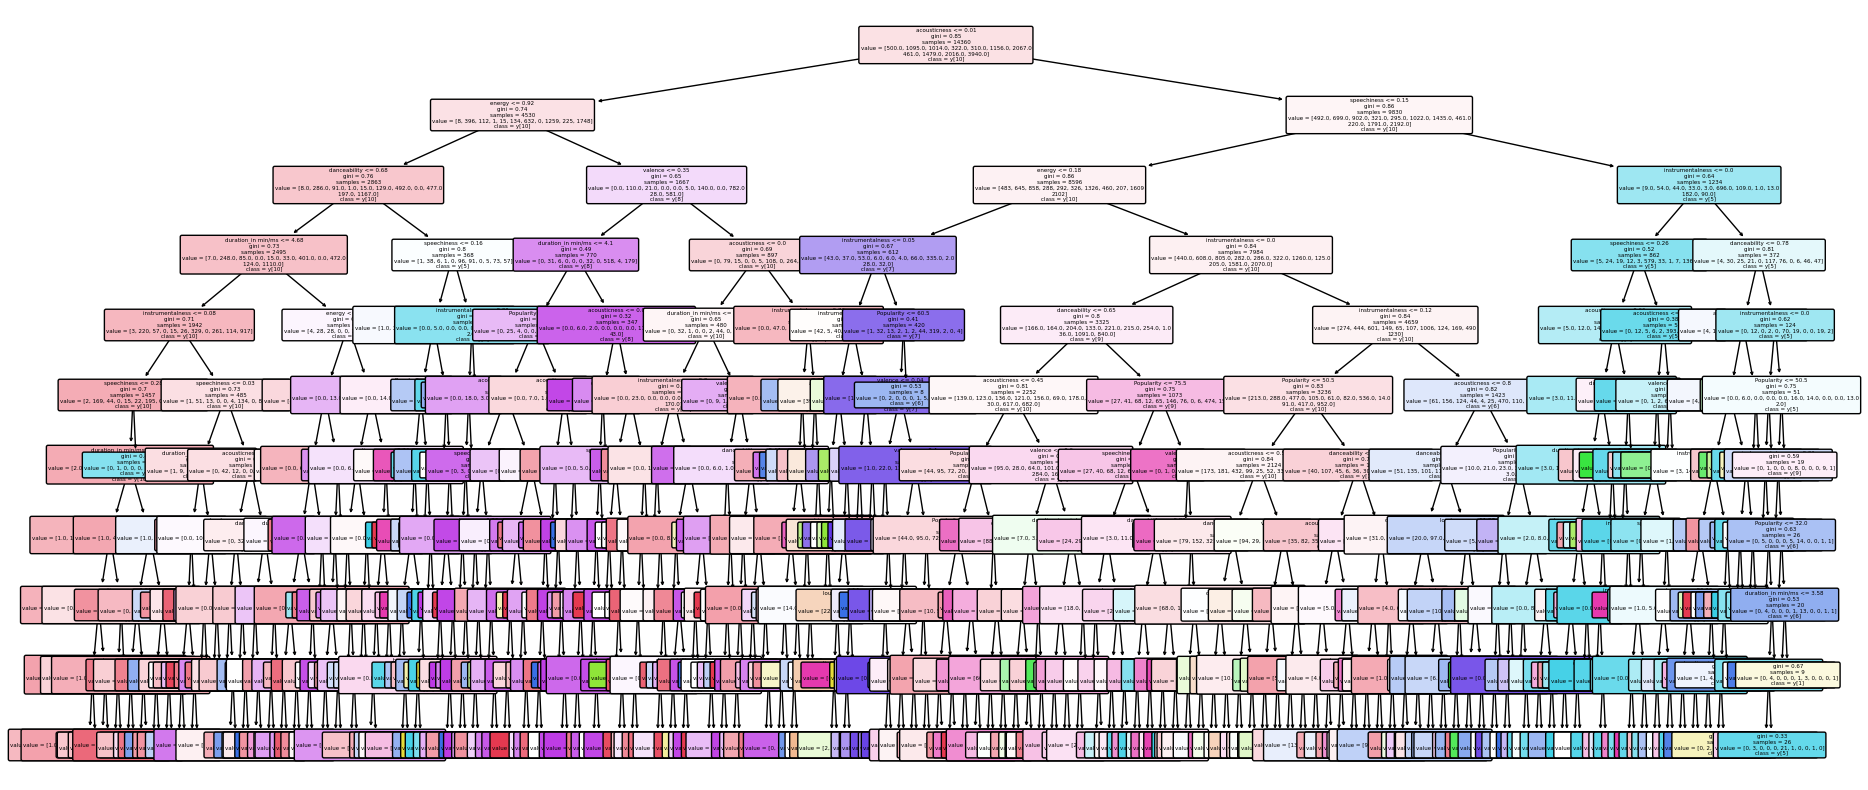

Accuracy: 0.4394319131161236
f1_score: 0.4127907408452206
Precision: 0.4143576695888733
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.16      0.20       125
           1       0.14      0.01      0.02       274
           2       0.36      0.21      0.27       254
           3       0.41      0.41      0.41        80
           4       0.28      0.06      0.11        77
           5       0.68      0.62      0.65       289
           6       0.31      0.28      0.29       517
           7       0.70      0.77      0.74       115
           8       0.54      0.52      0.53       370
           9       0.44      0.45      0.45       504
          10       0.42      0.64      0.50       986

    accuracy                           0.44      3591
   macro avg       0.41      0.38      0.38      3591
weighted avg       0.41      0.44      0.41      3591



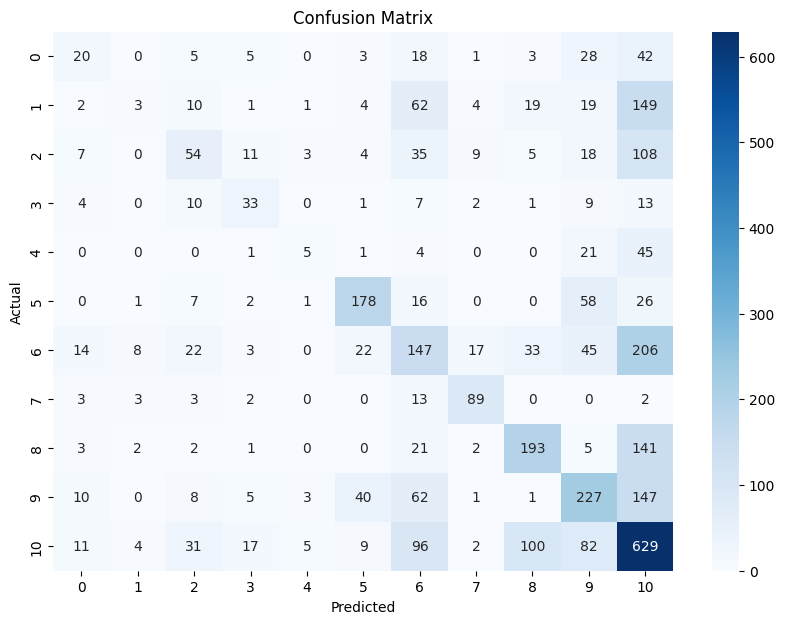

In [153]:
data = df
X = data.drop('Class', axis=1)
y = data['Class']

# Разделение выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111, stratify=data['Class'])
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 10, 12, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'splitter': ['best', 'random']
}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring = 'balanced_accuracy' )
grid_search.fit(X_train, y_train)

# Получение наилучших гиперпараметров
best_params = grid_search.best_params_
print(best_params)
# Оценка наилучшей модели на тестовом наборе данных
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
# Отрисовка дерева решений
plt.figure(figsize=(22, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=True, fontsize=4, rounded=True, precision=2)
plt.show()
plt.show()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred, average = 'weighted'))
print("Precision:", precision_score(y_test, y_pred, average = 'weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#визуализация
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Тут я перекодирую категориальные признаки с помощью OneHotEncoder, но лучше не стало, так что можно особо не смотреть

In [154]:
data = long_df
#print(len(data))
#Повторю, прекодировав категориальные признаки, с помощью oneHotEncoder
encoder = OneHotEncoder()
cat_data = data[['key', 'time_signature']] # предположим, data - это ваш датасет
cat_data = encoder.fit_transform(cat_data)
#print(cat_data.shape[0])
# Обновление датасета с закодированными признаками
data = data.drop(['key', 'time_signature'], axis=1) # удаление старых колонок
#print(len(data))
data_encoded = pd.concat([data, pd.DataFrame(cat_data.toarray(), columns=encoder.get_feature_names_out(['key', 'time_signature']))], axis=1)
#data_encoded.head()
data_encoded = data_encoded.dropna()
#print(len(data_encoded))
X = data_encoded.drop('Class', axis=1)
y = data_encoded['Class']
#len(y)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 15, 'splitter': 'best'}


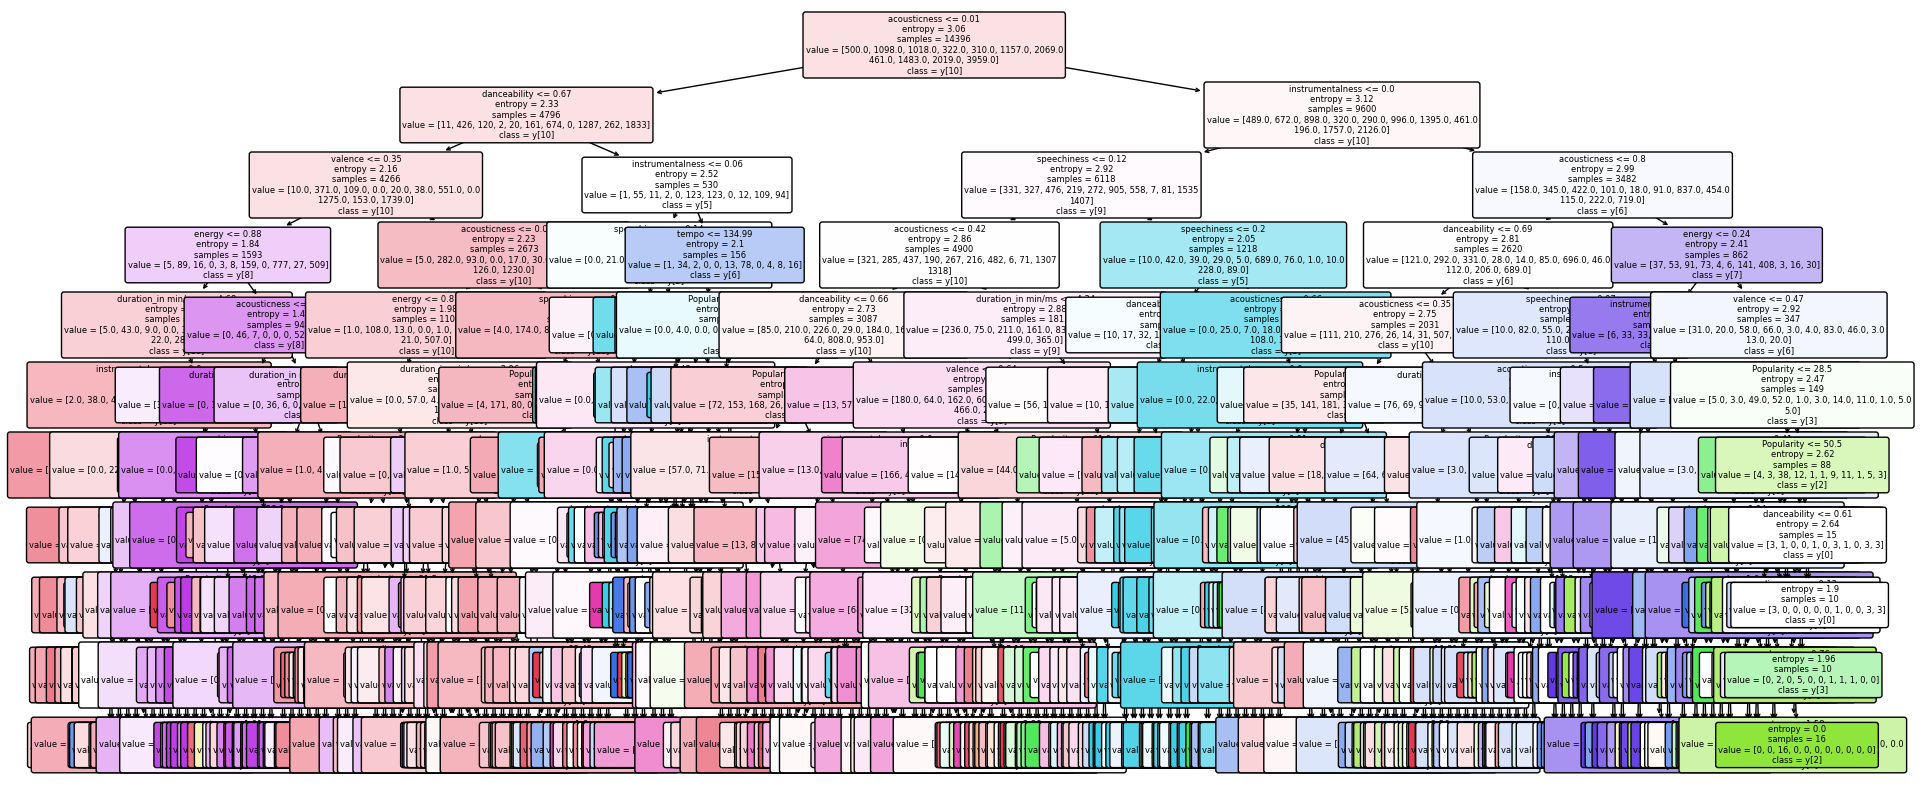

Accuracy: 0.4330555555555556
f1_score: 0.40966347812706416
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.15      0.17       125
           1       0.13      0.03      0.05       275
           2       0.38      0.22      0.28       254
           3       0.44      0.46      0.45        80
           4       0.14      0.08      0.10        77
           5       0.61      0.58      0.60       290
           6       0.32      0.24      0.27       518
           7       0.67      0.72      0.69       115
           8       0.59      0.52      0.55       371
           9       0.42      0.47      0.44       505
          10       0.43      0.64      0.51       990

    accuracy                           0.43      3600
   macro avg       0.39      0.37      0.37      3600
weighted avg       0.41      0.43      0.41      3600



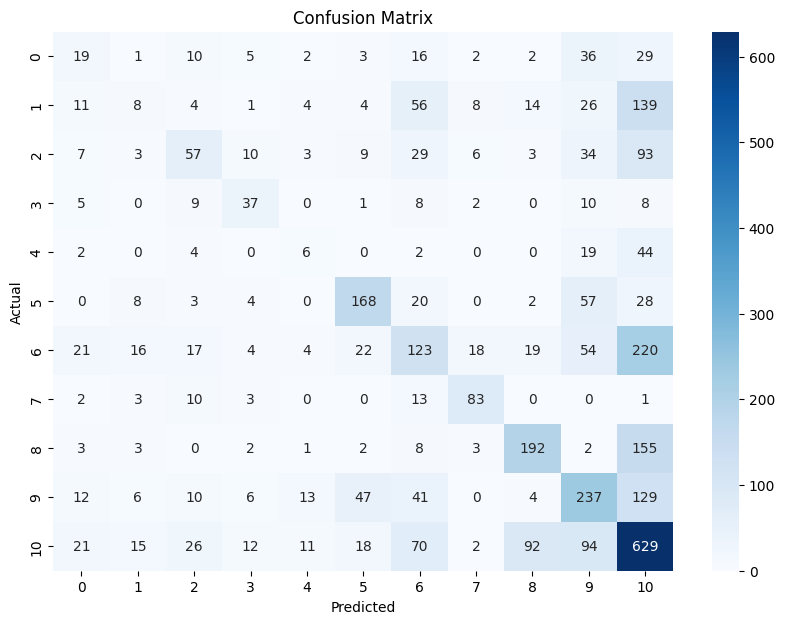

In [155]:


# Разделение выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111, stratify=data_encoded['Class'])
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'splitter': ['best', 'random']
}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring = 'balanced_accuracy')
grid_search.fit(X_train, y_train)

# Получение наилучших гиперпараметров
best_params = grid_search.best_params_
print(best_params)
# Оценка наилучшей модели на тестовом наборе данных
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
# Отрисовка дерева решений
plt.figure(figsize=(22, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=True, fontsize=6, rounded=True, precision=2)
plt.show()
plt.show()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred, average = 'weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#визуализация
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Задание 3. Другие модели (без баллов, просто если есть желание)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

Примерно также, но потом я поняла, что надо было нормировать бы данные для лучшего результата

/home/maria/miniforge3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/maria/miniforge3/envs/ML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/maria/miniforge3/envs/ML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precisi

Accuracy: 0.29444444444444445
Accuracy: 0.29444444444444445
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.00      0.00      0.00       275
           2       0.13      0.07      0.09       254
           3       0.30      0.09      0.14        80
           4       0.00      0.00      0.00        77
           5       0.00      0.00      0.00       290
           6       0.20      0.06      0.09       518
           7       0.40      0.68      0.50       115
           8       0.29      0.09      0.14       371
           9       0.44      0.08      0.13       505
          10       0.30      0.86      0.44       990

    accuracy                           0.29      3600
   macro avg       0.19      0.18      0.14      3600
weighted avg       0.23      0.29      0.19      3600

f1_score: 0.19345427574375723
Precision: 0.23060626669491532


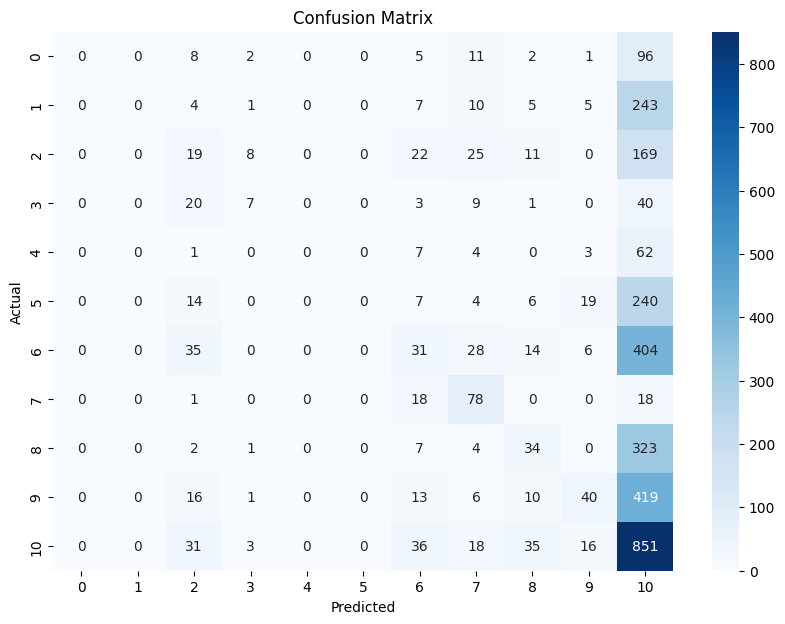

In [156]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter= 100 )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred, average = 'weighted'))
print("Precision:", precision_score(y_test, y_pred, average = 'weighted'))
#визуализация
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Задание 4. (0.5 доп. балла)

Расскажите про свои любимые фильмы, мультики и тд.

1. "Прибытие" Д. Вильнев

2. Сказка,  Сокуров

3. Вообще сейчас намного больше люблю документальные фильмы, Арт Док Фест и прочее надо смотреть